# Sensititivy Analysis for Unobserved Confounder with DML and Sensmakr


## Here we experiment with using package "sensemakr" in conjunction with debiased ML

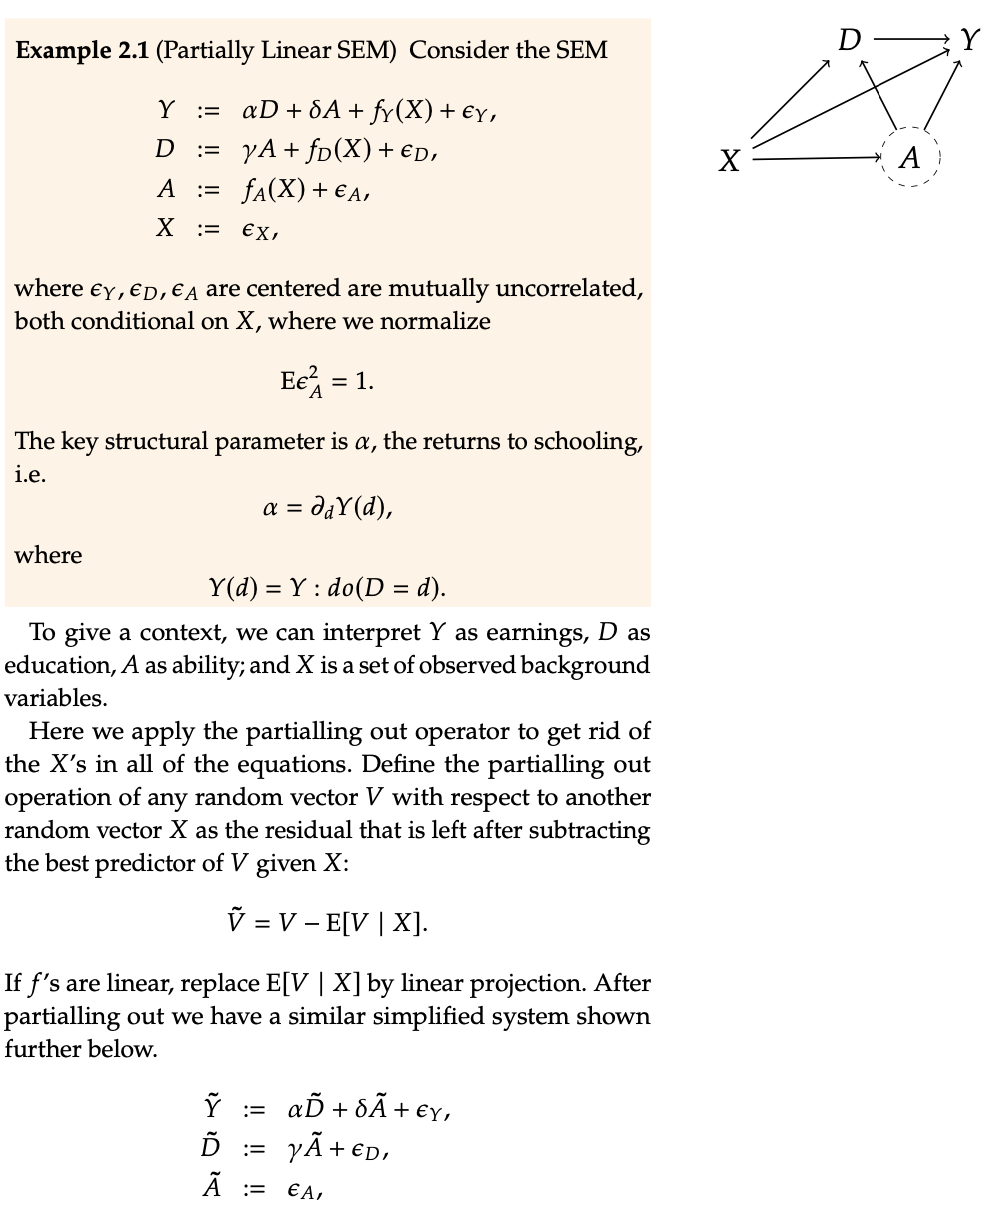

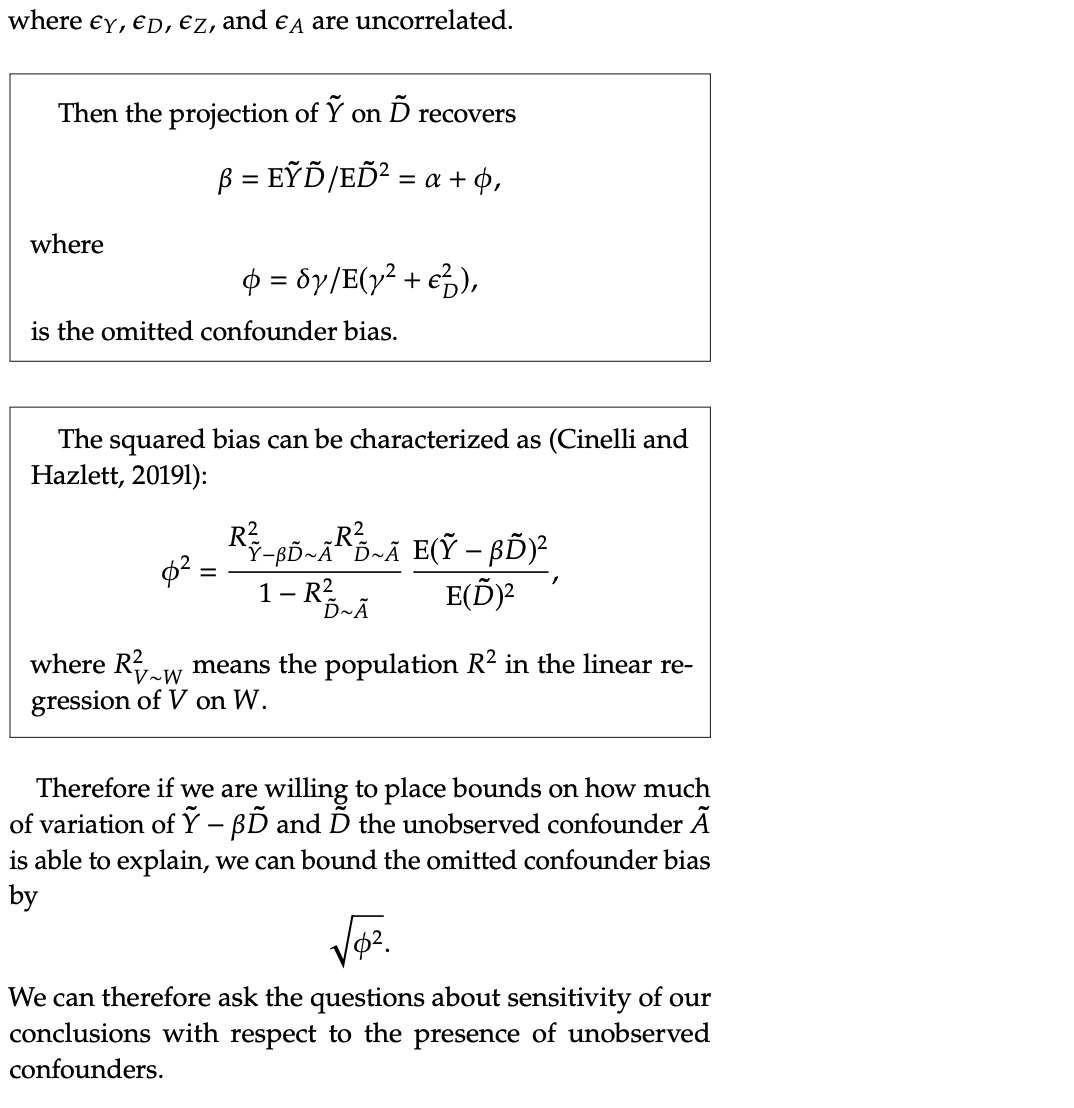

## We will 

## * mimic the partialling out procedure with machine learning tools, 

## * and invoke Sensmakr to compute $\phi^2$ and plot sensitivity results.


In [1]:
# loads package
install.packages("sensemakr")
library(sensemakr)

# loads data
data("darfur")


Installing package into 'C:/Users/Anzony/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'sensemakr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anzony\AppData\Local\Temp\RtmpCSX2H7\downloaded_packages


Warning message:
"package 'sensemakr' was built under R version 4.0.5"
See details in:

Carlos Cinelli and Chad Hazlett (2020). Making Sense of Sensitivity: Extending Omitted Variable Bias. Journal of the Royal Statistical Society, Series B (Statistical Methodology).



Data is described here 
https://cran.r-project.org/web/packages/sensemakr/vignettes/sensemakr.html

The main outcome is attitude towards peace -- the peacefactor.
The key variable of interest is whether the responders were directly harmed (directlyharmed).
We want to know if being directly harmed in the conflict causes people to support peace-enforcing measures.
The measured confounders include female indicator, age, farmer, herder, voted in the past, and household size.
There is also a village indicator, which we will treat as fixed effect and partial it out before conducting
the analysis. The standard errors will be clustered at the village level.

# Take out village fixed effects and run basic linear analysis

In [2]:
attach(darfur)

In [3]:
darfur

,wouldvote,peacefactor,peace_formerenemies,peace_jjindiv,peace_jjtribes,gos_soldier_execute,directlyharmed,age,farmer_dar,herder_dar,pastvoted,hhsize_darfur,village,female
,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
91,0,1.0000000,1,1,1,0,0,30,0,0,1,23,Abdel Khair,0
92,0,0.7068307,0,1,1,0,0,20,1,0,1,5,Abdi Dar,1
103,1,0.0000000,0,0,0,1,0,45,1,0,0,15,Abu Sorog,0
106,1,0.4951777,1,0,0,0,1,55,0,0,0,9,Abu Dejaj,0
107,0,0.0000000,0,0,0,1,1,25,1,0,1,7,Abu Dejaj,1
109,0,0.0000000,0,0,0,1,0,33,1,1,0,6,Abu Dejaj,1
110,0,0.0000000,0,0,0,1,1,25,0,0,0,12,Abu Gamra,0
112,0,0.7979916,1,1,1,1,0,25,0,0,1,5,Abu Gamra,1
115,0,0.0000000,0,0,0,1,0,60,1,0,1,6,Abu Gamra,1


In [4]:
#get rid of village fixed effects

library(lfe)

peacefactorR<- lm(peacefactor~village)$res
directlyharmedR<-  lm(directlyharmed~village)$res
femaleR<-  lm(female~village)$res
ageR<-     lm(age~village)$res
farmerR<-  lm(farmer_dar~village)$res
herderR<-  lm(herder_dar~village)$res
pastvotedR<- lm(pastvoted~village)$res
hhsizeR<-   lm(hhsize_darfur~village)$res

Warning message:
"package 'lfe' was built under R version 4.0.5"
Loading required package: Matrix



In [5]:
# Preliminary linear model analysis

summary(felm(peacefactorR~ directlyharmedR+ femaleR +
                     ageR + farmerR+ herderR + pastvotedR + hhsizeR |0|0|village))

# here we are clustering standard errors at the village level


summary(felm(peacefactorR~ femaleR +
                     ageR + farmerR+ herderR + pastvotedR + hhsizeR |0|0|village))

# here we are clustering standard errors at the village level



summary(felm(directlyharmedR~ femaleR +
                     ageR + farmerR+ herderR + pastvotedR + hhsizeR |0|0|village))

# here we are clustering standard errors at the village level


Call:
   felm(formula = peacefactorR ~ directlyharmedR + femaleR + ageR +      farmerR + herderR + pastvotedR + hhsizeR | 0 | 0 | village) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67487 -0.14712  0.00000  0.09857  0.90307 

Coefficients:
                  Estimate Cluster s.e. t value Pr(>|t|)    
(Intercept)     -3.681e-18    6.704e-16  -0.005  0.99562    
directlyharmedR  9.732e-02    2.382e-02   4.085 4.68e-05 ***
femaleR         -2.321e-01    2.444e-02  -9.495  < 2e-16 ***
ageR            -2.072e-03    7.441e-04  -2.784  0.00545 ** 
farmerR         -4.044e-02    2.956e-02  -1.368  0.17156    
herderR          1.428e-02    3.650e-02   0.391  0.69569    
pastvotedR      -4.802e-02    2.688e-02  -1.787  0.07420 .  
hhsizeR          1.230e-03    2.166e-03   0.568  0.57034    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2437 on 1268 degrees of freedom
Multiple R-squared(full model): 0.1542   Adjusted R-squared: 0.1


Call:
   felm(formula = peacefactorR ~ femaleR + ageR + farmerR + herderR +      pastvotedR + hhsizeR | 0 | 0 | village) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63765 -0.15168  0.00000  0.09859  0.90298 

Coefficients:
              Estimate Cluster s.e. t value Pr(>|t|)    
(Intercept) -2.635e-18    6.584e-16  -0.004  0.99681    
femaleR     -2.415e-01    2.536e-02  -9.522  < 2e-16 ***
ageR        -2.187e-03    7.453e-04  -2.934  0.00341 ** 
farmerR     -4.071e-02    2.923e-02  -1.393  0.16390    
herderR      2.623e-02    3.968e-02   0.661  0.50871    
pastvotedR  -4.414e-02    2.784e-02  -1.585  0.11313    
hhsizeR      1.336e-03    2.127e-03   0.628  0.52991    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2463 on 1269 degrees of freedom
Multiple R-squared(full model): 0.1353   Adjusted R-squared: 0.1312 
Multiple R-squared(proj model): 0.1353   Adjusted R-squared: 0.1312 
F-statistic(full model, *iid*): 33.1 


Call:
   felm(formula = directlyharmedR ~ femaleR + ageR + farmerR + herderR +      pastvotedR + hhsizeR | 0 | 0 | village) 

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8285 -0.3129  0.0000  0.2630  0.9076 

Coefficients:
              Estimate Cluster s.e. t value Pr(>|t|)  
(Intercept)  1.075e-17    5.196e-16   0.021   0.9835  
femaleR     -9.714e-02    5.129e-02  -1.894   0.0585 .
ageR        -1.182e-03    1.151e-03  -1.028   0.3044  
farmerR     -2.789e-03    4.280e-02  -0.065   0.9481  
herderR      1.228e-01    5.064e-02   2.425   0.0155 *
pastvotedR   3.991e-02    3.366e-02   1.186   0.2360  
hhsizeR      1.093e-03    3.286e-03   0.333   0.7394  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3744 on 1269 degrees of freedom
Multiple R-squared(full model): 0.0179   Adjusted R-squared: 0.01326 
Multiple R-squared(proj model): 0.0179   Adjusted R-squared: 0.01326 
F-statistic(full model, *iid*):3.856 on 6 and 1269 DF, p-v

# We first use Lasso for Partilling Out Controls

In [6]:
library(hdm)


resY =  rlasso(peacefactorR ~  (femaleR +
                     ageR + farmerR+ herderR + pastvotedR + hhsizeR)^3, post=F)$res

resD =  rlasso(directlyharmedR ~  (femaleR +
                     ageR + farmerR + herderR + pastvotedR + hhsizeR)^3 , post=F)$res

Warning message:
"package 'hdm' was built under R version 4.0.5"


In [7]:
library(hdm)

rlasso(peacefactorR ~  (femaleR +
                     ageR + farmerR+ herderR + pastvotedR + hhsizeR)^3, post=F)


Call:
rlasso.formula(formula = peacefactorR ~ (femaleR + ageR + farmerR + 
    herderR + pastvotedR + hhsizeR)^3, post = F)

Coefficients:
               (Intercept)                     femaleR  
                -0.0005935                  -0.2007349  
                      ageR                     farmerR  
                -0.0003813                  -0.0042197  
                   herderR                  pastvotedR  
                 0.0000000                   0.0000000  
                   hhsizeR                femaleR:ageR  
                 0.0000000                   0.0000000  
           femaleR:farmerR             femaleR:herderR  
                 0.0000000                   0.0000000  
        femaleR:pastvotedR             femaleR:hhsizeR  
                 0.0257554                   0.0000000  
              ageR:farmerR                ageR:herderR  
                 0.0000000                   0.0000000  
           ageR:pastvotedR                ageR:hhsizeR  
     

In [8]:
print(c("Controls explain the following fraction of variance of Outcome", 1-var(resY)/var(peacefactorR)))


print(c("Controls explain the following fraction of variance of Treatment", 1-var(resD)/var(directlyharmedR)))



library(lfe)


dml.darfur.model= felm(resY ~ resD|0|0|village)   # cluster SEs by village

summary(dml.darfur.model,robust=T)  #culster SE by village

dml.darfur.model= lm(resY ~ resD)  #lineaer model to use as input in sensemakr   

[1] "Controls explain the following fraction of variance of Outcome"
[2] "0.125108054898996"                                             
[1] "Controls explain the following fraction of variance of Treatment"
[2] "0.0119842379295229"                                              



Call:
   felm(formula = resY ~ resD | 0 | 0 | village) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63410 -0.15299  0.00069  0.09305  0.89593 

Coefficients:
              Estimate Cluster s.e. t value Pr(>|t|)    
(Intercept) -1.250e-18    1.594e-04   0.000        1    
resD         1.003e-01    2.443e-02   4.108 4.25e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2444 on 1274 degrees of freedom
Multiple R-squared(full model): 0.02312   Adjusted R-squared: 0.02235 
Multiple R-squared(proj model): 0.02312   Adjusted R-squared: 0.02235 
F-statistic(full model, *iid*):30.15 on 1 and 1274 DF, p-value: 4.82e-08 
F-statistic(proj model): 16.87 on 1 and 485 DF, p-value: 4.693e-05 



# Manual Bias Analysis

In [9]:
beta = dml.darfur.model$coef[2]
beta

resD 
0.1003364

In [10]:
varianceRatio

ERROR: Error in eval(expr, envir, enclos): object 'varianceRatio' not found


[1] 0.04020151


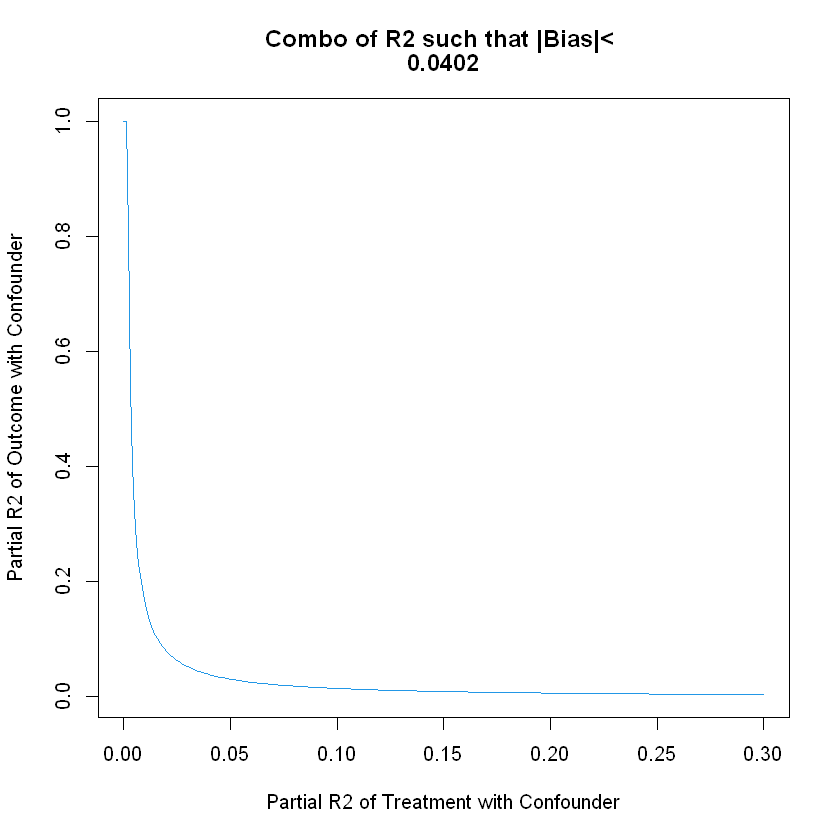

In [11]:
# Main estimate

beta = dml.darfur.model$coef[2]

# Hypothetical values of partial R2s 

R2.YC = .16; R2.DC = .01

# Elements of the formal

kappa<-  (R2.YC * R2.DC)/(1- R2.DC)

varianceRatio<- mean(dml.darfur.model$res^2)/mean(dml.darfur.model$res^2)

# Compute square bias 

BiasSq <-  kappa*varianceRatio

# Compute absolute value of the bias

print(sqrt(BiasSq))


# plotting 

gridR2.DC<- seq(0,.3, by=.001) 

gridR2.YC<- kappa*(1 - gridR2.DC)/gridR2.DC

gridR2.YC<- ifelse(gridR2.YC> 1, 1, gridR2.YC);



plot(gridR2.DC, gridR2.YC, type="l", col=4, xlab="Partial R2 of Treatment with Confounder", 
     ylab="Partial R2 of Outcome with Confounder",
    main= c("Combo of R2 such that |Bias|< ", round(sqrt(BiasSq), digits=4))
)







# Bias Analysis with Sensemakr

In [ ]:
methods(sensemakr)

In [ ]:
methods(sensemakr.formula)

In [ ]:
getAnywhere(sensemakr.lm)

In [ ]:
summary(sensemakr(model = dml.darfur.model, treatment = "resD"))

In [ ]:
class(sensemakr(model = dml.darfur.model, treatment = "resD"))

In [ ]:
match.call(sensemakr(model = dml.darfur.model, treatment = "resD"))

In [ ]:
hasArg(sensemakr(model = dml.darfur.model, treatment = "resD"))

In [13]:
model = sensemakr(model = dml.darfur.model, treatment = "resD")

In [33]:
unclass(model)

$info
$info$formula
resY ~ resD

$info$treatment
[1] "resD"

$info$q
[1] 1

$info$alpha
[1] 0.05

$info$reduce
[1] TRUE


$sensitivity_stats
  treatment  estimate         se t_statistic     r2yd.x    rv_q      rv_qa
1      resD 0.1003364 0.01827293    5.490987 0.02311921 0.14246 0.09408807
      f2yd.x  dof
1 0.02366636 1274


In [12]:
dml.darfur.sensitivity <- sensemakr(model = dml.darfur.model, 
                                treatment = "resD")
summary(dml.darfur.sensitivity)

Sensitivity Analysis to Unobserved Confounding

Model Formula: resY ~ resD

Null hypothesis: q = 1 and reduce = TRUE 
-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0 

Unadjusted Estimates of 'resD': 
  Coef. estimate: 0.1003 
  Standard Error: 0.0183 
  t-value (H0:tau = 0): 5.491 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 0.0231 
  Robustness Value, q = 1: 0.1425 
  Robustness Value, q = 1, alpha = 0.05: 0.0941 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an extreme confounder (orthogonal to the covariates) that explains 100% of the residual variance of the outcome, would need to explain at least 2.31% of the residual variance of the treatment to fully account for the observed estimated effect.

-- Robustness Value, q = 1: unobserved confounders (orthogonal to the covariates) that explain more than 14.25

In [ ]:
ovb_contour_plot.sensemakr <- function(x, sensitivity.of = c("estimate", "t-value"), ...){

  sensitivity.of <- match.arg(sensitivity.of)

  if (is.null(x$bounds)) {
    r2dz.x <- NULL
    r2yz.dx <- NULL
    bound_label = ""
  } else {
    r2dz.x <- x$bounds$r2dz.x
    r2yz.dx <- x$bounds$r2yz.dx
    bound_label = x$bounds$bound_label
  }

  estimate <- x$sensitivity_stats$estimate
  q <- x$info$q
  reduce <- x$info$reduce
  alpha <- x$info$alpha
  dof <- x$sensitivity_stats$dof
  thr <- ifelse(reduce, estimate*(1 - q), estimate*(1 + q) )
  t.thr <- abs(qt(alpha/2, df = dof - 1))*sign(x$sensitivity_stats$t_statistic)
  plot.env$treatment <- x$info$treatment

  with(x,
       ovb_contour_plot(estimate = sensitivity_stats$estimate,
                        se = sensitivity_stats$se,
                        dof = sensitivity_stats$dof,
                        r2dz.x = r2dz.x,
                        r2yz.dx = r2yz.dx,
                        bound_label = bound_label,
                        sensitivity.of = sensitivity.of,
                        reduce = reduce,
                        estimate.threshold = thr,
                        t.threshold = t.thr,
                        ...)

  )
}

ovb_contour_plot.lm = function(model,
                               treatment,
                               benchmark_covariates = NULL,
                               kd = 1,
                               ky = kd,
                               r2dz.x = NULL,
                               r2yz.dx = r2dz.x,
                               bound_label = "manual",
                               sensitivity.of = c("estimate", "t-value"),
                               reduce = TRUE,
                               estimate.threshold = 0,
                               t.threshold = 2,
                               nlevels = 10,
                               col.contour = "grey40",
                               col.thr.line = "red",
                               label.text = TRUE,
                               cex.label.text = .7,
                               round = 3,
                               ...) {


  check_multipliers(ky = ky, kd = kd)


  sensitivity.of <- match.arg(sensitivity.of)
  # extract model data
  if (!is.character(treatment)) stop("Argument treatment must be a string.")
  if (length(treatment) > 1) stop("You must pass only one treatment")

  model_data <- model_helper(model, covariates = treatment)
  estimate <- model_data$estimate
  se <- model_data$se
  dof <- model_data$dof

  if (!is.null(r2dz.x)) {
    check_r2(r2dz.x = r2dz.x, r2yz.dx = r2yz.dx)
    bounds <-  data.frame(r2dz.x = r2dz.x,
                          r2yz.dx = r2yz.dx,
                          bound_label = bound_label,
                          stringsAsFactors = FALSE)
  } else{
    bounds <-  NULL
  }

  if (!is.null(benchmark_covariates)) {

    # we will need to add an option for the bound type
    bench_bounds <- ovb_bounds(model = model,
                               treatment = treatment,
                               benchmark_covariates = benchmark_covariates,
                               kd = kd,
                               ky = ky,
                               adjusted_estimates = FALSE)
    bounds <- rbind(bounds, bench_bounds)
  }

  # update treatment env
  plot.env$treatment <- treatment

  ovb_contour_plot(estimate = estimate,
                   se = se,
                   dof = dof,
                   reduce = reduce,
                   estimate.threshold = estimate.threshold,
                   r2dz.x = bounds$r2dz.x,
                   r2yz.dx = bounds$r2yz.dx,
                   bound_label = bounds$bound_label,
                   sensitivity.of = sensitivity.of,
                   t.threshold = t.threshold,
                   nlevels = nlevels,
                   col.contour = col.contour,
                   col.thr.line = col.thr.line,
                   label.text = label.text,
                   cex.label.text = cex.label.text,
                   round = round,
                   ...)


}

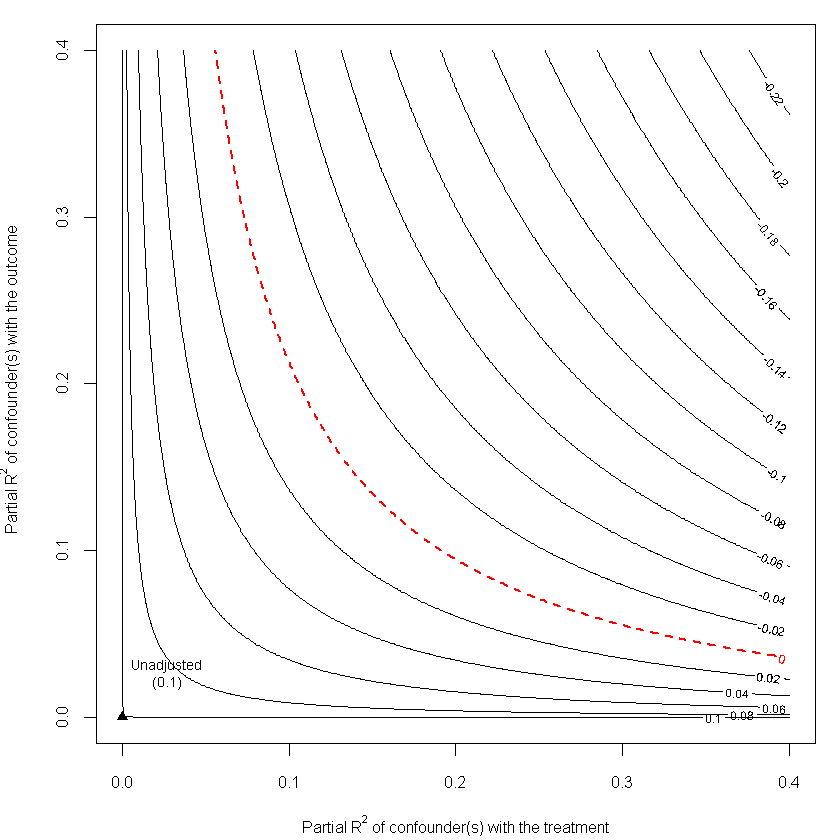

In [13]:
plot(dml.darfur.sensitivity, nlevels = 15)

# Next We use Random Forest as ML tool for Partialling Out

The following code does DML with clsutered standard errors by ClusterID

In [6]:
DML2.for.PLM <- function(x, d, y, dreg, yreg, nfold=2, clusterID) {
  nobs <- nrow(x) #number of observations
  foldid <- rep.int(1:nfold,times = ceiling(nobs/nfold))[sample.int(nobs)] #define folds indices
  I <- split(1:nobs, foldid)  #split observation indices into folds  
  ytil <- dtil <- rep(NA, nobs)
  cat("fold: ")
  for(b in 1:length(I)){
    dfit <- dreg(x[-I[[b]],], d[-I[[b]]]) #take a fold out
    yfit <- yreg(x[-I[[b]],], y[-I[[b]]]) # take a foldt out
    dhat <- predict(dfit, x[I[[b]],], type="response") #predict the left-out fold 
    yhat <- predict(yfit, x[I[[b]],], type="response") #predict the left-out fold 
    dtil[I[[b]]] <- (d[I[[b]]] - dhat) #record residual for the left-out fold
    ytil[I[[b]]] <- (y[I[[b]]] - yhat) #record residial for the left-out fold
    cat(b," ")
        }
  rfit <- felm(ytil ~ dtil |0|0|clusterID)    #get clustered standard errors using felm
  rfitSummary<- summary(rfit)
  coef.est <-  rfitSummary$coef[2] #extract coefficient
  se <- rfitSummary$coef[2,2]  #record robust standard error
  cat(sprintf("\ncoef (se) = %g (%g)\n", coef.est , se))  #printing output
  return( list(coef.est =coef.est , se=se, dtil=dtil, ytil=ytil) ) #save output and residuals 
}

In [7]:
library(randomForest)  #random Forest library


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [26]:
x= model.matrix(~  femaleR + ageR + farmerR + herderR + pastvotedR + hhsizeR)

In [27]:
x

,(Intercept),femaleR,ageR,farmerR,herderR,pastvotedR,hhsizeR
1,1,-2.760937e-13,1.034785e-11,1.147866e-12,1.850662e-13,-3.836312e-13,-2.743320e-12
2,1,-8.102033e-18,-1.009891e-16,1.376919e-17,3.233754e-19,-8.190372e-18,-3.695663e-17
3,1,-3.333333e-01,6.666667e-01,3.333333e-01,-1.415949e-14,-6.666667e-01,4.666667e+00
4,1,-6.666667e-01,1.733333e+01,-6.666667e-01,-3.333333e-01,-3.333333e-01,1.666667e+00
5,1,3.333333e-01,-1.266667e+01,3.333333e-01,-3.333333e-01,6.666667e-01,-3.333333e-01
6,1,3.333333e-01,-4.666667e+00,3.333333e-01,6.666667e-01,-3.333333e-01,-1.333333e+00
7,1,-3.958333e-01,-1.852083e+01,-7.916667e-01,-1.666667e-01,-7.083333e-01,1.041667e-01
8,1,6.041667e-01,-1.852083e+01,-7.916667e-01,-1.666667e-01,2.916667e-01,-6.895833e+00
9,1,6.041667e-01,1.647917e+01,2.083333e-01,-1.666667e-01,2.916667e-01,-5.895833e+00
10,1,6.041667e-01,-1.352083e+01,2.083333e-01,-1.666667e-01,-7.083333e-01,3.104167e+00


[1] 1276    7

fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.097853 (0.0248297)
[1] "Controls explain the following fraction of variance of Outcome"
[2] "0.0451160320722748"                                            
[1] "Controls explain the following fraction of variance of Treatment"
[2] "0"                                                               
Sensitivity Analysis to Unobserved Confounding

Model Formula: resY ~ resD

Null hypothesis: q = 1 and reduce = TRUE 
-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0 

Unadjusted Estimates of 'resD': 
  Coef. estimate: 0.0979 
  Standard Error: 0.0182 
  t-value (H0:tau = 0): 5.3655 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 0.0221 
  Robustness Value, q = 1: 0.1394 
  Robustness Value, q = 1, alpha = 0.05: 0.0909 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an 

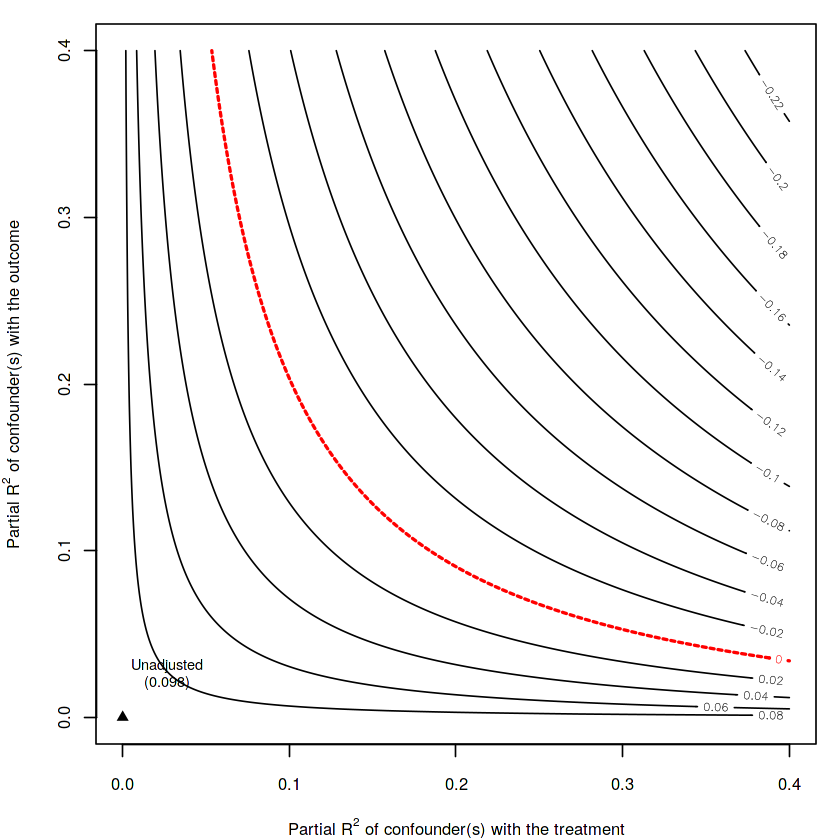

In [8]:
dim(x)

d= directlyharmedR

y = peacefactorR;

#DML with Random Forest:
dreg <- function(x,d){ randomForest(x, d) } #ML method=Forest 
yreg <- function(x,y){ randomForest(x, y) } #ML method=Forest
set.seed(1)
DML2.RF = DML2.for.PLM(x, d, y, dreg, yreg, nfold=10, clusterID=village)


resY =  DML2.RF$ytil

resD =  DML2.RF$dtil


print(c("Controls explain the following fraction of variance of Outcome", max(1-var(resY)/var(peacefactorR),0)))


print(c("Controls explain the following fraction of variance of Treatment", max(1-var(resD)/var(directlyharmedR),0)))



dml.darfur.model= lm(resY~resD) 


dml.darfur.sensitivity <- sensemakr(model = dml.darfur.model, 
                                treatment = "resD")
summary(dml.darfur.sensitivity)

plot(dml.darfur.sensitivity,nlevels = 15)